In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('Iris.csv')
print(df.head(5))
print(df.shape)

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


In [3]:
br=df['target']
data=df.drop('target',axis=1)
print(data.shape)
print(br.shape)

(150, 4)
(150,)


In [4]:
std_d=StandardScaler().fit_transform(data)
print(std_d.shape)

(150, 4)


In [5]:
sample_data=std_d
covar_matrix=np.matmul(sample_data.T,sample_data)
print("the shape of covariance matrix=",covar_matrix.shape)

the shape of covariance matrix= (4, 4)


In [6]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(2,3))

print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(4, 2)
(2, 4)


In [7]:
new_coordinates=np.matmul(vectors,sample_data.T)
print(vectors.shape,"X",sample_data.shape, "=",new_coordinates.shape)

(2, 4) X (150, 4) = (2, 150)


In [18]:
new_co_dints=np.vstack((new_coordinates,br)).T
dataframe=pd.DataFrame(data=new_co_dints,columns=("PC1","PC2","Target"))
print(dataframe.head())

        PC1       PC2       Target
0 -0.505704 -2.264542  Iris-setosa
1  0.655405 -2.086426  Iris-setosa
2  0.318477  -2.36795  Iris-setosa
3  0.575368 -2.304197  Iris-setosa
4 -0.674767 -2.388777  Iris-setosa


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


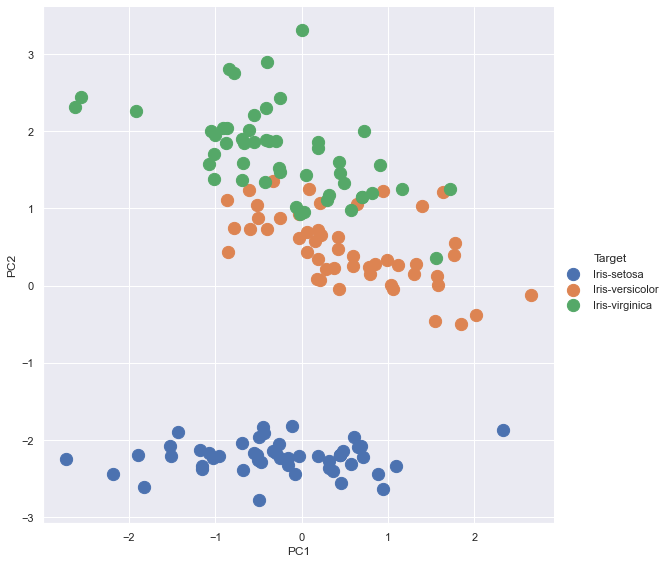

In [19]:
import seaborn as sn
sn.FacetGrid(dataframe,hue="Target",size=8).map(plt.scatter,"PC1","PC2",s=150).add_legend()

### clustring of reduce data set

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


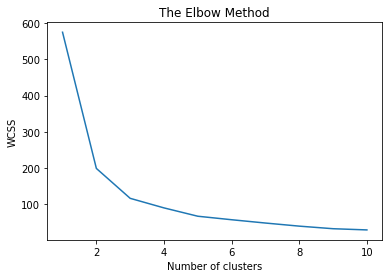

In [11]:
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X=dataframe.iloc[:,0:2]

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 1 1 1 3 3 1 1 1 1 3 1 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 3 1 1 1 3 3 3 1 1 3
 1 1 1 3 1 1 3 3 1 3 1 3 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 2 0 0
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [13]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\gaura\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['linalg', 'power', 'fft', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


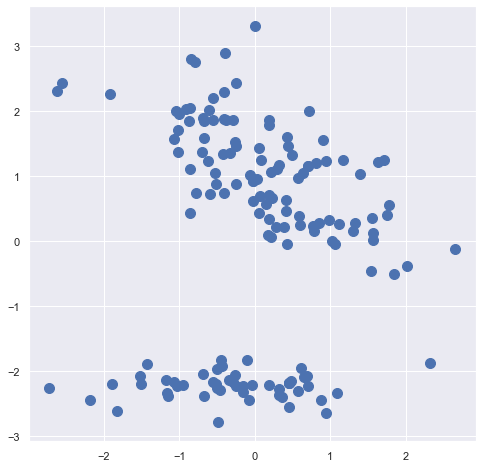

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


plt.figure(figsize=(8, 8))

plt.scatter(dataframe['PC1'],dataframe['PC2'],s=100)

plt.show()

In [21]:
x = dataframe.iloc[:,0:2] 
x

,PC1,PC2
0,-0.505704,-2.264542
1,0.655405,-2.086426
2,0.318477,-2.36795
3,0.575368,-2.304197
4,-0.674767,-2.388777
...,...,...
145,-0.382822,1.870522
146,0.905314,1.558492
147,-0.266795,1.520845
148,-1.016362,1.376391


In [22]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [23]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1])

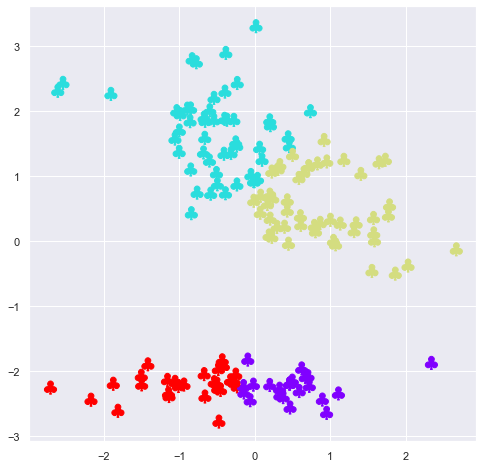

In [24]:
data_with_clusters = dataframe.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.figure(figsize=(8, 8))
plt.scatter(data_with_clusters['PC1'],data_with_clusters['PC2'],c=data_with_clusters['Clusters'],s=200,marker='$\clubsuit$',cmap='rainbow')


### Here I am going to perfoem linear regression on reduced data set .

In [25]:
dataframe

,PC1,PC2,Target
0,-0.505704,-2.264542,Iris-setosa
1,0.655405,-2.086426,Iris-setosa
2,0.318477,-2.36795,Iris-setosa
3,0.575368,-2.304197,Iris-setosa
4,-0.674767,-2.388777,Iris-setosa
...,...,...,...
145,-0.382822,1.870522,Iris-virginica
146,0.905314,1.558492,Iris-virginica
147,-0.266795,1.520845,Iris-virginica
148,-1.016362,1.376391,Iris-virginica


In [26]:
feature_cols = ['PC1']
X = dataframe[feature_cols]
y = dataframe['PC2']
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

3.661080264019078e-31
[-4.98630233e-16]


In [28]:
X_new = pd.DataFrame({'PC1': [2.16]})
X_new.head()

,PC1
0,2.16


In [29]:
lm.predict(X_new)

array([-1.0770413e-15])

In [31]:
X_new = pd.DataFrame({'PCA1': [dataframe['PC1'].min(), dataframe['PC1'].max()]})
X_new.head()

,PCA1
0,-2.722371
1,2.658063


In [34]:
preds = lm.predict(X_new)
preds

array([ 1.35745652e-15, -1.32539041e-15])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


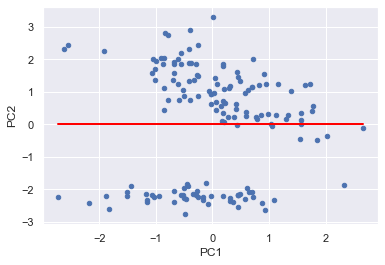

In [35]:
dataframe.plot(kind='scatter', x='PC1', y='PC2')
plt.plot(X_new, preds, c='red', linewidth=2)